In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

from reconstruction_functions import *


In [2]:
nubb_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
nubb_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_5percent_reco.h5", "meta")
nubb_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.25percent_reco.h5", "meta")
nubb_meta_01percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.1percent_reco.h5", "meta")
nubb_meta_005percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.05percent_reco.h5", "meta")
nubb_meta_00percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.0percent_reco.h5", "meta")
# display(nubb_meta_nodiff)
# display(nubb_meta_5percent)


Tl_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_nodiff_reco.h5", "meta")
Tl_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_5percent_reco.h5", "meta")
Tl_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.25percent_reco.h5", "meta")
Tl_meta_01percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.1percent_reco.h5", "meta")
Tl_meta_005percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.05percent_reco.h5", "meta")
Tl_meta_00percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_ion_1bar_0.0percent_reco.h5", "meta")
# display(Tl_meta_nodiff)
# display(Tl_meta_5percent)

Bi_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_nodiff_reco.h5", "meta")
Bi_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_5percent_reco.h5", "meta")
Bi_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.25percent_reco.h5", "meta")
Bi_meta_01percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.1percent_reco.h5", "meta")
Bi_meta_005percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.05percent_reco.h5", "meta")
Bi_meta_00percent = pd.read_hdf("../data/Trackreco/ATPC_Bi_ion_1bar_0.0percent_reco.h5", "meta")
# display(Bi_meta_nodiff)
# display(Bi_meta_5percent)


single_meta_nodiff     = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_nodiff_reco.h5", "meta")
single_meta_5percent   = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_5percent_reco.h5", "meta")
single_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.25percent_reco.h5", "meta")
single_meta_01percent  = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.1percent_reco.h5", "meta")
single_meta_005percent  = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.05percent_reco.h5", "meta")
single_meta_00percent  = pd.read_hdf("../data/Trackreco/ATPC_single_1bar_0.0percent_reco.h5", "meta")


Bkg_meta_nodiff      = pd.concat([Tl_meta_nodiff,     Bi_meta_nodiff, single_meta_nodiff])
Bkg_meta_5percent    = pd.concat([Tl_meta_5percent,   Bi_meta_5percent, single_meta_5percent])
Bkg_meta_025percent  = pd.concat([Tl_meta_025percent, Bi_meta_025percent, single_meta_025percent])
Bkg_meta_01percent   = pd.concat([Tl_meta_01percent,  Bi_meta_01percent, single_meta_01percent])
Bkg_meta_005percent   = pd.concat([Tl_meta_005percent,  Bi_meta_005percent, single_meta_005percent])
Bkg_meta_00percent   = pd.concat([Tl_meta_00percent,  Bi_meta_00percent, single_meta_00percent])

# Bkg_meta_nodiff      = pd.concat([single_meta_nodiff])
# Bkg_meta_5percent    = pd.concat([single_meta_5percent])
# Bkg_meta_025percent  = pd.concat([single_meta_025percent])
# Bkg_meta_01percent   = pd.concat([single_meta_01percent])
# Bkg_meta_00percent   = pd.concat([single_meta_00percent])


# Bkg_meta_nodiff      = pd.concat([Bi_meta_nodiff])
# Bkg_meta_5percent    = pd.concat([Bi_meta_5percent])
# Bkg_meta_025percent  = pd.concat([Bi_meta_025percent])
# Bkg_meta_01percent   = pd.concat([Bi_meta_01percent])
# Bkg_meta_00percent   = pd.concat([Bi_meta_00percent])



In [3]:
num_nubb_nodiff     = len(nubb_meta_nodiff.event_id.unique())
num_nubb_5percent   = len(nubb_meta_5percent.event_id.unique())
num_nubb_025percent = len(nubb_meta_025percent.event_id.unique())
num_nubb_01percent  = len(nubb_meta_01percent.event_id.unique())
num_nubb_005percent = len(nubb_meta_005percent.event_id.unique())
num_nubb_00percent  = len(nubb_meta_00percent.event_id.unique())

num_Bkg_nodiff      = len(Bkg_meta_nodiff.event_id.unique())
num_Bkg_5percent    = len(Bkg_meta_5percent.event_id.unique())
num_Bkg_025percent  = len(Bkg_meta_025percent.event_id.unique())
num_Bkg_01percent   = len(Bkg_meta_01percent.event_id.unique())
num_Bkg_005percent  = len(Bkg_meta_005percent.event_id.unique())
num_Bkg_00percent   = len(Bkg_meta_00percent.event_id.unique())

num_Bi_nodiff      = len(Bi_meta_nodiff.event_id.unique())
num_Bi_5percent    = len(Bi_meta_5percent.event_id.unique())
num_Bi_025percent  = len(Bi_meta_025percent.event_id.unique())
num_Bi_01percent   = len(Bi_meta_01percent.event_id.unique())
num_Bi_005percent  = len(Bi_meta_005percent.event_id.unique())
num_Bi_00percent   = len(Bi_meta_00percent.event_id.unique())

num_Tl_nodiff      = len(Tl_meta_nodiff.event_id.unique())
num_Tl_5percent    = len(Tl_meta_5percent.event_id.unique())
num_Tl_025percent  = len(Tl_meta_025percent.event_id.unique())
num_Tl_01percent   = len(Tl_meta_01percent.event_id.unique())
num_Tl_005percent  = len(Tl_meta_005percent.event_id.unique())
num_Tl_00percent   = len(Tl_meta_00percent.event_id.unique())

num_single_nodiff      = len(single_meta_nodiff.event_id.unique())
num_single_5percent    = len(single_meta_5percent.event_id.unique())
num_single_025percent  = len(single_meta_025percent.event_id.unique())
num_single_01percent   = len(single_meta_01percent.event_id.unique())
num_single_005percent  = len(single_meta_005percent.event_id.unique())
num_single_00percent   = len(single_meta_00percent.event_id.unique())


sf_nubb_nodiff     = 1
sf_nubb_5percent   = num_nubb_nodiff / num_nubb_5percent
sf_nubb_025percent = num_nubb_nodiff / num_nubb_025percent
sf_nubb_01percent  = num_nubb_nodiff / num_nubb_01percent
sf_nubb_005percent = num_nubb_nodiff / num_nubb_005percent
sf_nubb_00percent  = num_nubb_nodiff / num_nubb_00percent

sf_Bkg_nodiff      = num_nubb_nodiff / num_Bkg_nodiff
sf_Bkg_5percent    = num_nubb_nodiff / num_Bkg_5percent
sf_Bkg_025percent  = num_nubb_nodiff / num_Bkg_025percent
sf_Bkg_01percent   = num_nubb_nodiff / num_Bkg_01percent
sf_Bkg_005percent  = num_nubb_nodiff / num_Bkg_005percent
sf_Bkg_00percent   = num_nubb_nodiff / num_Bkg_00percent

print("tot, scale fact num_nubb_nodiff:",     num_nubb_nodiff,     sf_nubb_nodiff)
print("tot, scale fact num_nubb_5percent:",   num_nubb_5percent,   sf_nubb_5percent)
print("tot, scale fact num_nubb_025percent:", num_nubb_025percent, sf_nubb_025percent)
print("tot, scale fact num_nubb_01percent:",  num_nubb_01percent,  sf_nubb_01percent)
print("tot, scale fact num_nubb_005percent:", num_nubb_005percent, sf_nubb_005percent)
print("tot, scale fact num_nubb_00percent:",  num_nubb_00percent,  sf_nubb_00percent)

print("tot, scale fact num_Tl_nodiff:",       num_Bkg_nodiff,      sf_Bkg_nodiff)
print("tot, scale fact num_Tl_5percent:",     num_Bkg_5percent,    sf_Bkg_5percent)
print("tot, scale fact num_Tl_025percent:",   num_Bkg_025percent,  sf_Bkg_025percent)
print("tot, scale fact num_Tl_01percent:",    num_Bkg_01percent,   sf_Bkg_01percent)
print("tot, scale fact num_Tl_005percent:",   num_Bkg_005percent,  sf_Bkg_005percent)
print("tot, scale fact num_Tl_00percent:",    num_Bkg_00percent,   sf_Bkg_00percent)

tot, scale fact num_nubb_nodiff: 192298 1
tot, scale fact num_nubb_5percent: 192287 1.0000572061553823
tot, scale fact num_nubb_025percent: 192291 1.0000364031597944
tot, scale fact num_nubb_01percent: 192361 0.9996724907855542
tot, scale fact num_nubb_005percent: 192298 1.0
tot, scale fact num_nubb_00percent: 192177 1.0006296278951174
tot, scale fact num_Tl_nodiff: 599762 0.32062384745949224
tot, scale fact num_Tl_5percent: 599388 0.32082390705185954
tot, scale fact num_Tl_025percent: 595884 0.3227104604251834
tot, scale fact num_Tl_01percent: 591976 0.3248408719272403
tot, scale fact num_Tl_005percent: 594825 0.32328499978985414
tot, scale fact num_Tl_00percent: 593914 0.32378088410106515


In [4]:
# Plot some variables like number of tracks
%matplotlib widget

# fig, axs = plt.subplots(7, 3, figsize=(15, 25))


# num_nubb_nodiff_cut     = PlotDistributions(nubb_meta_nodiff,     "orange",   "0nubb no diff", 1,   "nodiff",      "all",  1.0, sf_nubb_nodiff,     axs, True)
# num_nubb_5percent_cut   = PlotDistributions(nubb_meta_5percent,   "gold",     "0nubb 5% CO2", 1,    "5percent",    "all",  1.0, sf_nubb_5percent,   axs, True)
# num_nubb_025percent_cut = PlotDistributions(nubb_meta_025percent, "seagreen", "0nubb 0.25% CO2", 1, "0.25percent", "all",  1.0, sf_nubb_025percent, axs, True)
# num_nubb_01percent_cut  = PlotDistributions(nubb_meta_01percent,  "Pink",     "0nubb 0.1% CO2", 1,  "0.1percent",  "all",  1.0, sf_nubb_01percent,  axs, True)
# num_nubb_00percent_cut  = PlotDistributions(nubb_meta_00percent,  "darkgreen","0nubb Pure Xe", 1,  "0.0percent",   "all",  1.0, sf_nubb_00percent,  axs, True)

# num_Bkg_nodiff_cut     = PlotDistributions(Bkg_meta_nodiff,     "Teal",       "Bkg no diff", 1,   "nodiff",      "all",  1.0, sf_Bkg_nodiff,     axs, True)
# num_Bkg_5percent_cut   = PlotDistributions(Bkg_meta_5percent,   "steelblue",  "Bkg 5% CO2", 1,    "5percent",    "all",  1.0, sf_Bkg_5percent,   axs, True)
# num_Bkg_025percent_cut = PlotDistributions(Bkg_meta_025percent, "slategray",  "Bkg 0.25% CO2", 1, "0.25percent", "all",  1.0, sf_Bkg_025percent, axs, True)
# num_Bkg_01percent_cut  = PlotDistributions(Bkg_meta_01percent,  "darkviolet", "Bkg 0.1% CO2", 1,  "0.1percent",  "all",  1.0, sf_Bkg_01percent,  axs, True)
# num_Bkg_00percent_cut  = PlotDistributions(Bkg_meta_00percent,  "k",          "Bkg Pure Xe", 1,  "0.0percent",   "all",  1.0, sf_Bkg_00percent,  axs, True)


In [5]:
def ApplyCutsnoPlot(df_meta, pressure, diffusion, mode, E_res):
    
    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, E_res)
    df_primary = df_primary[ cuts ]

    return len(df_primary.event_id.unique())

On Diffusion no diff
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.028  +/- 0.113 %
Bkg Rej: Bkg: 0.537 +/- 0.009 %      (bkg rej == 99.463 %)
On Diffusion 5% 
CO2
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.305  +/- 0.113 %
Bkg Rej: Bkg: 0.592 +/- 0.01 %      (bkg rej == 99.408 %)
On Diffusion 0.25% 
CO2
Correcting Efficiency by factor  0.69
Efficiency nubb: 29.933  +/- 0.113 %
Bkg Rej: Bkg: 0.784 +/- 0.011 %      (bkg rej == 99.216 %)
On Diffusion 0.1% 
CO2
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.381  +/- 0.113 %
Bkg Rej: Bkg: 1.089 +/- 0.013 %      (bkg rej == 98.911 %)
On Diffusion 10%
He
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.865  +/- 0.113 %
Bkg Rej: Bkg: 1.524 +/- 0.016 %      (bkg rej == 98.476 %)
On Diffusion Pure Xe
Correcting Efficiency by factor  0.69
Efficiency nubb: 30.288  +/- 0.113 %
Bkg Rej: Bkg: 4.79 +/- 0.028 %      (bkg rej == 95.21 %)
On Diffusion no diff
Correcting Efficiency by factor  0.69
Efficiency

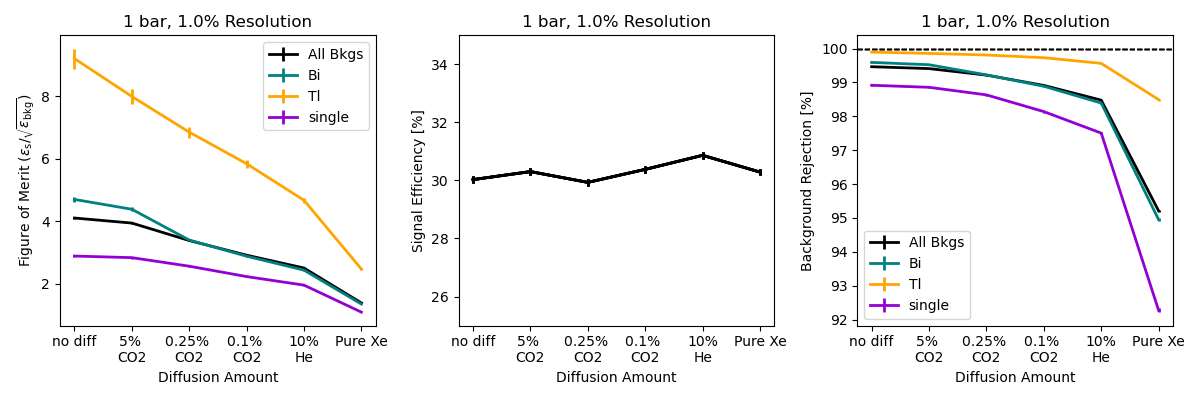

In [8]:
nubb_meta = [nubb_meta_nodiff, nubb_meta_5percent, nubb_meta_025percent, nubb_meta_01percent,nubb_meta_005percent, nubb_meta_00percent]
Bkg_meta  = [Bkg_meta_nodiff,  Bkg_meta_5percent,  Bkg_meta_025percent,  Bkg_meta_01percent,Bkg_meta_005percent,  Bkg_meta_00percent]
Bi_meta  = [Bi_meta_nodiff,  Bi_meta_5percent,  Bi_meta_025percent,  Bi_meta_01percent,Bi_meta_005percent, Bi_meta_00percent]
Tl_meta  = [Tl_meta_nodiff,  Tl_meta_5percent,  Tl_meta_025percent,  Tl_meta_01percent, Tl_meta_005percent, Tl_meta_00percent]
single_meta  = [single_meta_nodiff,  single_meta_5percent,  single_meta_025percent,  single_meta_01percent, single_meta_005percent, single_meta_00percent]


num_nubb = [num_nubb_nodiff, num_nubb_5percent, num_nubb_025percent, num_nubb_01percent,num_nubb_005percent, num_nubb_00percent]
num_Bkg  = [num_Bkg_nodiff,  num_Bkg_5percent, num_Bkg_025percent, num_Bkg_01percent,num_Bkg_005percent, num_Bkg_00percent]
num_Bi  = [num_Bi_nodiff,  num_Bi_5percent, num_Bi_025percent, num_Bi_01percent,num_Bi_005percent, num_Bi_00percent]
num_Tl  = [num_Tl_nodiff,  num_Tl_5percent, num_Tl_025percent, num_Tl_01percent,num_Tl_005percent, num_Tl_00percent]
num_single  = [num_single_nodiff,  num_single_5percent, num_single_025percent, num_single_01percent,num_single_005percent, num_single_00percent]

cols = ["k", "Teal", "Orange", "darkviolet", "Yellow",  "Pink"]
diffusion_labels = ["no diff", "5% \nCO2", "0.25% \nCO2", "0.1% \nCO2", "10%\nHe" ,"Pure Xe"]
diffusions = ["nodiff","5percent", "0.25percent", "0.1percent", "0.05percent", "0.0percent"]
pressures = [1, 1, 1, 1, 1, 1]



# mode = "enr"
mode = "nat"

if mode == "enr":
    mass = 1
    selection = "all"
else:
    mass = 10
    selection = "nat"


def PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, col_index, labels):

    fom = []
    fom_err = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Diffusion", diffusion_labels[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diffusions[index], selection, E_res)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diffusions[index], selection, E_res)
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb", pressures[index], mass)
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg", pressures[index], mass)
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

        fom.append(FOM(nubb_eff,  Bkg_eff_))
        fom_err.append(Calc_FOM_err(fom[index], nubb_eff, nubb_err, Bkg_eff_, Bkg_err_))

    axs[0].errorbar(diffusion_labels, fom, fom_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[0].set_xlabel("Diffusion Amount")
    axs[0].set_ylabel(r"Figure of Merit ($\epsilon_{\mathrm{s}}/\sqrt{\epsilon_{\mathrm{bkg}}}$)")

    axs[1].errorbar(diffusion_labels, eff, eff_err, color="k", linewidth = 2, label =f"{labels[col_index]}")
    axs[1].set_xlabel("Diffusion Amount")
    axs[1].set_ylabel("Signal Efficiency [%]")
    axs[1].set_ylim(25,35)

    axs[2].errorbar(diffusion_labels, Bkg_eff, Bkg_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[2].set_xlabel("Diffusion Amount")
    axs[2].set_ylabel("Background Rejection [%]")


    axs[0].legend()
    # axs[1].legend()
    axs[2].legend()
    axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)

    axs[0].set_title(f"1 bar, {E_res}% Resolution")
    axs[1].set_title(f"1 bar, {E_res}% Resolution")
    axs[2].set_title(f"1 bar, {E_res}% Resolution")

    plt.tight_layout()

    return Bkg_eff

labels=["All Bkgs", "Bi", "Tl", "single"]

for E_res in [1.0]:

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    bkg_perf_all    = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, 0, labels))/100
    bkg_perf_Bi     = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, Bi_meta, num_Bi, E_res, 1, labels))/100
    bkg_perf_Tl     = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, Tl_meta, num_Tl, E_res, 2, labels))/100
    bkg_perf_single = 1 - np.array(PlotPerformance(nubb_meta, num_nubb, single_meta, num_single, E_res, 3, labels))/100

    if (E_res == 1.0):
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_1percent_diffusion_{mode}.pdf")
    else:
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_0.5percent_diffusion_{mode}.pdf")




In [7]:
# Lets study the containment fractions

def PrintContainment(df, label):
    print( f"{label} contained fraction:", round(100*len(df[df.contained==True].event_id.unique())/ len(df.event_id.unique()), 2) )

PrintContainment(nubb_meta_nodiff, "0nubb no diff")
PrintContainment(nubb_meta_5percent, "0nubb 5%")
PrintContainment(nubb_meta_025percent, "0nubb 0.25%")
PrintContainment(nubb_meta_01percent, "0nubb 0.1%")
PrintContainment(nubb_meta_005percent, "0nubb 10% He")
PrintContainment(nubb_meta_00percent, "0nubb pure Xe")
print("\n\n")
PrintContainment(single_meta_nodiff, "single no diff")
PrintContainment(single_meta_5percent, "single 5%")
PrintContainment(single_meta_025percent, "single 0.25%")
PrintContainment(single_meta_01percent, "single 0.1%")
PrintContainment(single_meta_005percent, "single 10% He")
PrintContainment(single_meta_00percent, "single pure Xe")




0nubb no diff contained fraction: 97.58
0nubb 5% contained fraction: 97.63
0nubb 0.25% contained fraction: 98.34
0nubb 0.1% contained fraction: 98.99
0nubb 10% He contained fraction: 98.98
0nubb pure Xe contained fraction: 98.59



single no diff contained fraction: 89.23
single 5% contained fraction: 89.46
single 0.25% contained fraction: 92.08
single 0.1% contained fraction: 95.11
single 10% He contained fraction: 95.83
single pure Xe contained fraction: 96.59
